# Week 8 Summary
1. Presentation slides.
2. Heatmap visualisation.

Following the eQTL analysis results, I have made little progress in further analysis. While preparing for the upcoming presentation, I pondered on what observations and hypothesis I can infer from the data I have now. 

## Are there clusters of eQTLs that are linked to regulatory genes?
Recall the format of the eQTL results.

In [1]:
wd <- 'C:/Users/migue/Documents/Projects/Natural Sciences Interdisciplinary Project/project'
setwd(wd)
source(file = 'code/eqtl_analysis.R')

head(output_eqtl)

Rows read: 876 done.

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 19208 done.

Matching data files and location files

18959 of 19208 genes matched

876 of 876 SNPs matched


Task finished in 0 seconds

Reordering genes

Task finished in 0.2 seconds

Processing covariates

Task finished in 0.01 seconds

Processing gene expression data (imputation, residualization)

Task finished in 0.07 seconds

Creating output file(s)

Task finished in 0.04 seconds

Performing eQTL analysis

10.00% done, 4,326 cis-eQTLs, 186,886 trans-eQTLs

19.99% done, 9,745 cis-eQTLs, 371,856 trans-eQTLs

30.00% done, 14,032 cis-eQTLs, 557,763 trans-eQTLs

39.99% done, 16,420 cis-eQTLs, 747,548 trans-eQTLs

50.00% done, 19,773 cis-eQTLs, 935,406 trans-eQTLs

60.00% done, 26,166 cis-eQTLs, 1,123,282 trans-eQTLs

70.00% done, 30,760 cis-eQTLs, 1,313,690 trans-eQTLs

80.00% done, 34,564

,SNP,gene,beta,t.stat,p.value,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,snp_42,AT1G08930,343.56980,36.75741,2.812966e-44,8.479489e-39
2,snp_42,AT1G09940,18.41343,28.41751,1.235921e-37,1.862798e-32
3,snp_1328,AT4G16860,31.71452,27.52106,8.028240e-37,6.050142e-32
4,snp_1326,AT4G16860,-31.71452,-27.52106,8.028240e-37,6.050142e-32
5,snp_1841,AT5G47910,-70.69076,-27.16917,1.697322e-36,1.023292e-31
6,snp_42,AT1G07135,485.45145,26.24286,1.267625e-35,6.368614e-31


I then imported Ethan's GRN, and subsetted the df to only include regulatory genes.

In [2]:
library(readxl)

gene_regulatory_network <- read_excel(path = 'data/raw/media-10.xlsx')
regulatory_genes <- unique(gene_regulatory_network$`regulatory gene`)

subset_output_eqtl <- output_eqtl[which(output_eqtl$gene %in% regulatory_genes),]

head(gene_regulatory_network)
print(paste(length(regulatory_genes),"unique regulatory genes and",length(unique(subset_output_eqtl$SNP)),"unique SNPs in subset_output_eqtl", sep = " "))

weight,regulatory gene,target gene
<dbl>,<chr>,<chr>
0.17116523,AT3G25990,AT5G48500
0.05560764,AT3G25990,AT1G34260
0.10075060,AT3G25990,AT1G59820
0.04651452,AT3G25990,AT1G13020
0.08755182,AT3G25990,AT1G75220
0.04639002,AT3G25990,AT2G31990


[1] "44 unique regulatory genes and 411 unique SNPs in subset_output_eqtl"


It was difficult thinking about how to subset the SNPs. I decided upon subsetting by the most frequent SNPs (i.e. has most number of connections to genes).

In [3]:
snp_table<- table(subset_output_eqtl$SNP) # Tables number of regulatory genes each snp is associated with
snp_table <- snp_table[order(-snp_table)] # Descending order
connected_snps <- unlist(dimnames(snp_table[1:100])) # 100 most connected snps
subset_output_eqtl <- subset_output_eqtl[which(subset_output_eqtl$SNP %in% connected_snps),] # Subset for connected snps

print(paste(length(regulatory_genes),"unique regulatory genes and",length(unique(subset_output_eqtl$SNP)),"unique SNPs in subset_output_eqtl", sep = " "))

[1] "44 unique regulatory genes and 100 unique SNPs in subset_output_eqtl"


Now I had a suitable size of data to construct a heatmap.

Loading required package: viridisLite



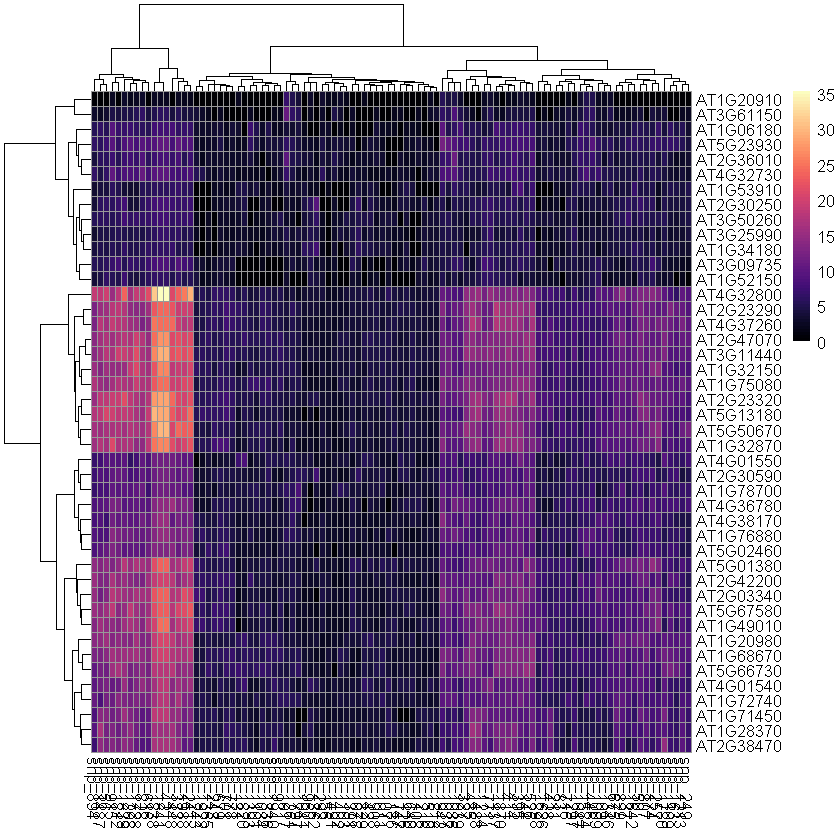

In [4]:
## Create the adjacency matrix.
adj_mat <- matrix(
    data = 0,
    dimnames = list(regulatory_genes, connected_snps),
    nrow = length(regulatory_genes), ncol = length(connected_snps)
  )
for (i in seq(nrow(subset_output_eqtl))){
    snp <- subset_output_eqtl$SNP[i]
    gene <- subset_output_eqtl$gene[i]
    logp <- -log(subset_output_eqtl$p.value[i], base = 10)
    adj_mat[gene,snp] <- logp
}

## Load packages
library(pheatmap)
library(viridis)

## Visualise heatmap
pheatmap(adj_mat, magma(80))

You can see on the heatmap that there is a cluster on the middle-bottom left*.
## Plan for next week
1. Obtain the SNPs in the cluster (*), find the associated gene they are located within and its description. Make one of the first biological conclusions of the project.
2. Add figure to presentation and explain.
3. Include 1. in the presentation.
4. Add to presentation: elastic net and next steps, bigger picture and real-world application

In [ ]:
!jupyter nbconvert --to html week_8_summary.ipynb